# Summary Report: SGD vs GD for Minimizing $f(x) = \|A(x - b)\|^2$

## 🎯 Objective

Implement and compare **Stochastic Gradient Descent (SGD)** and **Full Gradient Descent (GD)** to minimize the quadratic objective:

$$
f(x) = \|A(x - b)\|^2
$$

using different learning rate schedules and analyzing convergence behaviors.


## 🧠 Implementation Details

- `f(A, b, x)`: Computes the objective.
- `grad_f_i(a_i, b, x)`: Computes the stochastic gradient from one row of $A$.
- `grad_f_full(A, b, x)`: Computes the full gradient: $\nabla f(x) = 2A^TA(x - b)$.
- `sgd(...)` and `gd(...)`: Track the error at each epoch as $|f(x_k) - f(x^*)|$.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def f(A, b, x):
    """Compute f(x) = ||A(x - b)||^2"""
    diff = x - b
    return np.linalg.norm(A @ diff) ** 2

def grad_f_i(a_i, b, x):
    """Compute stochastic gradient of f using only one row a_i of A"""
    return 2 * a_i.T @ (a_i @ (x - b))

# Full gradient
def grad_f_full(A, b, x):
    return 2 * A.T @ A @ (x - b)

def sgd(A, b, x0, epochs, lr_schedule):
    m, n = A.shape
    x = x0.copy()
    errors = []
    
    # Compute true solution x* = b
    x_star = b.copy()
    f_star = f(A, b, x_star)
    
    for k in range(1, epochs + 1):
        i = np.random.randint(m)
        a_i = A[i:i+1, :]
        gamma = lr_schedule(k)
        grad = grad_f_i(a_i, b, x).reshape(-1, 1)
        x -= gamma * grad
        
        fx = f(A, b, x)
        errors.append(abs(fx - f_star))

    return x, errors
    
def gd(A, b, x0, epochs, lr_schedule):
    m, n = A.shape
    x = x0.copy()
    errors = []

    # True solution
    x_star = b.copy()
    f_star = f(A, b, x_star)

    for k in range(1, epochs + 1):
        gamma = lr_schedule_gd(k)
        grad = grad_f_full(A, b, x)
        x -= gamma * grad

        fx = f(A, b, x)
        errors.append(abs(fx - f_star))

    return x, errors

# Stocastic Gradient Descent

In [19]:
# Setup
np.random.seed(42)
m, n = 100, 10
A = np.random.randn(m, n)
b = np.random.randn(n, 1)
x0 = np.zeros((n, 1))
print('A:\n',A[:5])
print('x:\n',x0[:5])
print('b:\n',b[:5])

A:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783 -0.56228753
  -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272  0.11092259
  -1.15099358  0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
   0.2088636  -1.95967012 -1.32818605  0.19686124]
 [ 0.73846658  0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421
  -0.46063877  1.05712223  0.34361829 -1.76304016]]
x:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
b:
 [[ 1.39935544]
 [ 0.92463368]
 [ 0.05963037]
 [-0.64693678]
 [ 0.69822331]]


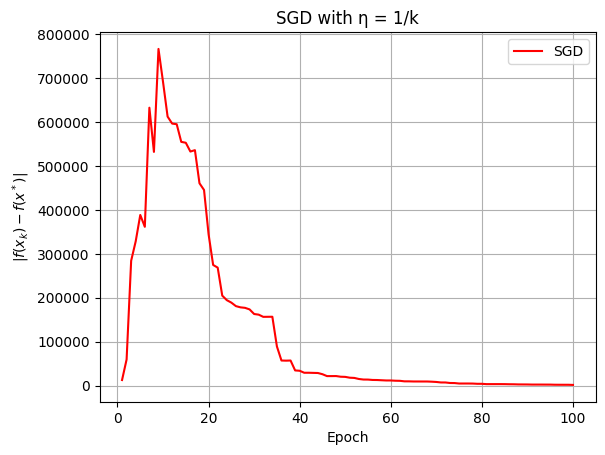

In [5]:
# Learning rate schedule: 1/k
lr_schedule_sgd1 = lambda k: 1.0/k
# Learning rate schedule: 1/10k
lr_schedule_sgd2 = lambda k: 1.0/(10* k)

# Run SGD
x_sgd1, error_sgd1 = sgd(A, b, x0, epochs=100, lr_schedule=lr_schedule_sgd1)

# Plot error histories
plt.plot(range(1, 101), error_sgd1, color='red', label='SGD')
# plt.plot(range(1, 101), error_gd, color='green', label='Full GD')
plt.xlabel("Epoch")
plt.ylabel(r"$|f(x_k) - f(x^*)|$")
plt.title("SGD with η = 1/k")
# plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

## ⚠️ Learning Rate: $\eta_k = \dfrac{1}{k}$

- Produced a **bell-curved-shape**
- Initially seemed unstable, error raising, error suddenly started converging around epoch 15.
- Cause: large early steps (e.g., $\eta_1 = 1$) led to **overshooting** and **numerical instability**.
- Confirmed via runtime warnings and sharp error rise.


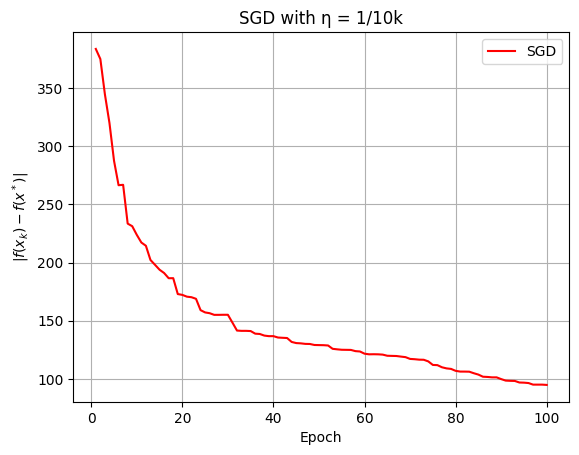

In [6]:
x_sgd2, error_sgd2 = sgd(A, b, x0, epochs=100, lr_schedule=lr_schedule_sgd2)
# Plot error histories
plt.plot(range(1, 101), error_sgd2, color='red', label='SGD')
# plt.plot(range(1, 101), error_gd, color='green', label='Full GD')
plt.xlabel("Epoch")
plt.ylabel(r"$|f(x_k) - f(x^*)|$")
plt.title("SGD with η = 1/10k")
# plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

## 🛠 Fix: Slower Learning Rate $\eta_k = \dfrac{1}{10k}$

- Improved stability for SGD.
- Produced a decresing function from the begining

# Comparison With Gradient Descent

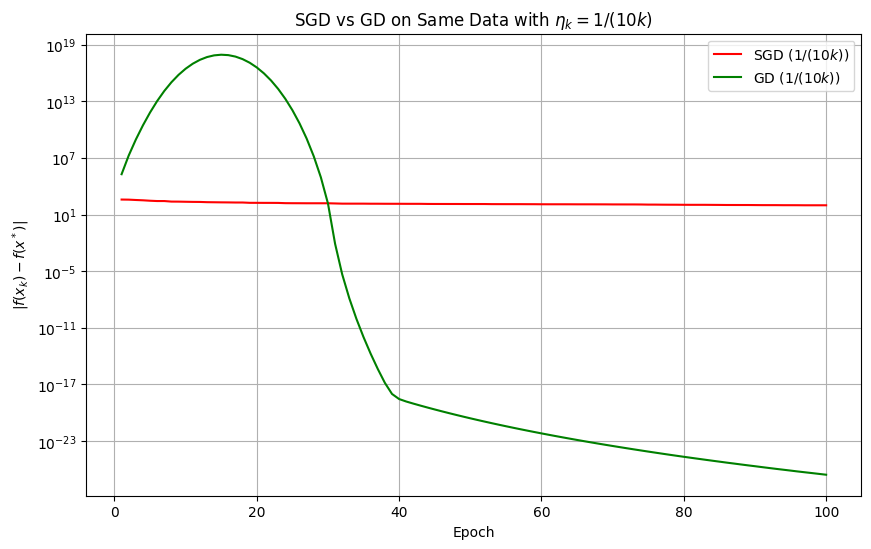

In [11]:
lr_schedule_gd = lambda k: 1.0/(10* k)
x_gd, error_gd = gd(A, b, x0, epochs=100, lr_schedule=lr_schedule_gd)

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), error_sgd2[:100], label='SGD ($1/(10k)$)', color='red')
plt.plot(range(1, 101), error_gd[:100], label='GD ($1/(10k)$)', color='green')
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel(r"$|f(x_k) - f(x^*)|$")
plt.title("SGD vs GD on Same Data with $\\eta_k = 1/(10k)$")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
x_sgd2

array([[ 1.05951329],
       [ 0.8298427 ],
       [ 0.12978974],
       [ 0.04123617],
       [ 0.90210954],
       [ 0.00301393],
       [ 0.59905372],
       [ 0.28204161],
       [ 0.68393024],
       [-0.61266994]])

In [14]:
x_gd

array([[ 1.39935544],
       [ 0.92463368],
       [ 0.05963037],
       [-0.64693678],
       [ 0.69822331],
       [ 0.39348539],
       [ 0.89519322],
       [ 0.6351718 ],
       [ 1.04955272],
       [-0.53523521]])

In [15]:
x_star = np.linalg.lstsq(A, A @ b, rcond=None)[0]
x_star

array([[ 1.39935544],
       [ 0.92463368],
       [ 0.05963037],
       [-0.64693678],
       [ 0.69822331],
       [ 0.39348539],
       [ 0.89519322],
       [ 0.6351718 ],
       [ 1.04955272],
       [-0.53523521]])